In [2]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np

In [4]:
url = "https://raw.githubusercontent.com/Mao2003/Mao2003/main/results.csv"
df= pd.read_csv(url,encoding = 'unicode_escape')
pysqldf = lambda q: sqldf(q, globals())

In [5]:
df1=pysqldf("SELECT date, home_team, AVG(home_score) AS [avg_hg], AVG(away_score) AS [avg_ac], COUNT(tournament) AS [cnt_t]\
             FROM df\
             GROUP BY home_team\
             HAVING COUNT(tournament)>5\
             ORDER BY cnt_t DESC")

df2=df1.head(5)
print(df2)

         date  home_team    avg_hg    avg_ac  cnt_t
0  1916-07-08     Brazil  2.476589  0.814381    598
1  1903-09-13  Argentina  2.205882  0.847751    578
2  1923-12-09     Mexico  2.007092  0.882979    564
3  1909-04-04    Germany  2.464286  1.050752    532
4  1873-03-08    England  2.303605  0.882353    527


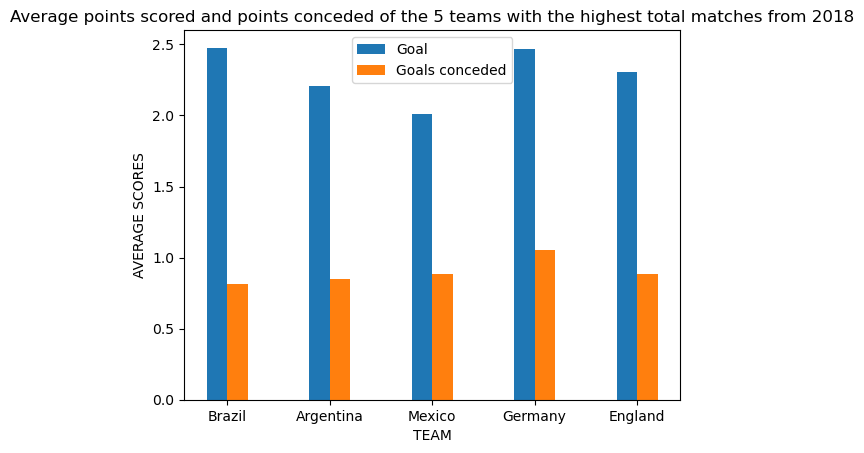

In [6]:
categories = df2['home_team']
values1 = df2['avg_hg']
values2 = df2['avg_ac']

bar_width = 0.20
x = np.arange(len(categories))

plt.bar(x - bar_width/2, values1, bar_width, label='Goal')
plt.bar(x + bar_width/2, values2, bar_width, label='Goals conceded')

plt.xlabel('TEAM')
plt.ylabel('AVERAGE SCORES')
plt.title('Average points scored and points conceded of the 5 teams with the highest total matches from 2018')

plt.xticks(x, categories)
plt.legend()
plt.show()